# 🍷 Red Wine Quality Dataset — Exploratory Data Analysis (EDA)

---

## 🧠 Introduction

In this section, we will perform **Exploratory Data Analysis (EDA)** on the **Red Wine Quality Dataset**  
to understand the relationships between different chemical properties of red wine and their corresponding **quality scores**.

This dataset contains various **physicochemical features** (like acidity, sugar, pH, alcohol) and a **target variable** `quality`,  
which represents the wine's rating on a scale (typically 0–10).

---

### 📂 Dataset Overview

The dataset typically includes the following features:

| Feature | Description |
|----------|--------------|
| fixed acidity | Concentration of non-volatile acids (tartaric acid, etc.) |
| volatile acidity | Amount of acetic acid in the wine (causes vinegar taste) |
| citric acid | Adds freshness and flavor to wine |
| residual sugar | Amount of sugar left after fermentation |
| chlorides | Salt content in the wine |
| free sulfur dioxide | SO₂ in free form (protects wine from oxidation) |
| total sulfur dioxide | Combined SO₂ level (affects preservation) |
| density | Density of wine, related to sugar and alcohol content |
| pH | Acidity level of the wine |
| sulphates | Contribute to wine preservation and flavor |
| alcohol | Alcohol percentage of the wine |
| quality | Wine quality score (target variable, integer 0–10) |

---

## ⚙️ Objective

We aim to:
1. Understand data distribution for each chemical feature.  
2. Detect outliers and anomalies.  
3. Study correlations among features.  
4. Identify features that strongly influence the **wine quality**.  

Formally, we are trying to understand:

$$
f(\text{acidity, sugar, sulphates, alcohol, ...}) \rightarrow \text{quality}
$$

---

## 🔍 Key Analytical Questions

1. How are the numeric features distributed (normal/skewed)?  
2. Which features are most correlated with wine quality?  
3. Does higher alcohol content always imply higher quality?  
4. Are there strong linear or non-linear relationships between chemical properties?

---

## 📊 Exploratory Analysis Plan

We’ll cover the following steps:

1. **Data Loading and Overview**  
   - Dataset structure, shape, and types  
   - Missing values and basic statistics

2. **Univariate Analysis**  
   - Distribution plots and summary statistics  

3. **Bivariate Analysis**  
   - Correlation heatmap  
   - Pairwise scatter plots between features and `quality`

4. **Outlier Detection**  
   - Boxplots and IQR-based detection  

5. **Feature Relationships**  
   - Investigate linear/non-linear relations between chemical properties and quality

---

## 📘 Mathematical Note: Correlation

We often measure linear relationships between variables using **Pearson’s correlation coefficient**, given by:

$$
r_{xy} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}}
$$

Where:
- $r_{xy}$ → correlation coefficient between variables $x$ and $y$
- $\bar{x}$, $\bar{y}$ → means of $x$ and $y$

The value of $r_{xy}$ lies between **-1 and +1**, where:
- $r_{xy} = +1$ → Perfect positive correlation  
- $r_{xy} = -1$ → Perfect negative correlation  
- $r_{xy} = 0$ → No linear correlation

---

## 🌐 See More

For detailed dataset description and downloadable CSV file, visit:

🔗 [Red Wine Quality Dataset — UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)

---

✅ **Next Step:**  
Let’s start by loading the dataset into Pandas and performing an initial data inspection (`.info()`, `.describe()`, `.isna()`).


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

--- Describe ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Unique quality scores: [np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

--- Missing values per column ---


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Number of duplicate rows found: 240
Duplicates dropped. New shape: (1359, 12)

Top features correlated with quality (absolute value):


quality                 1.000000
alcohol                 0.480343
volatile acidity        0.395214
sulphates               0.248835
citric acid             0.228057
density                 0.184252
total sulfur dioxide    0.177855
chlorides               0.130988
fixed acidity           0.119024
pH                      0.055245
free sulfur dioxide     0.050463
residual sugar          0.013640
Name: quality, dtype: float64

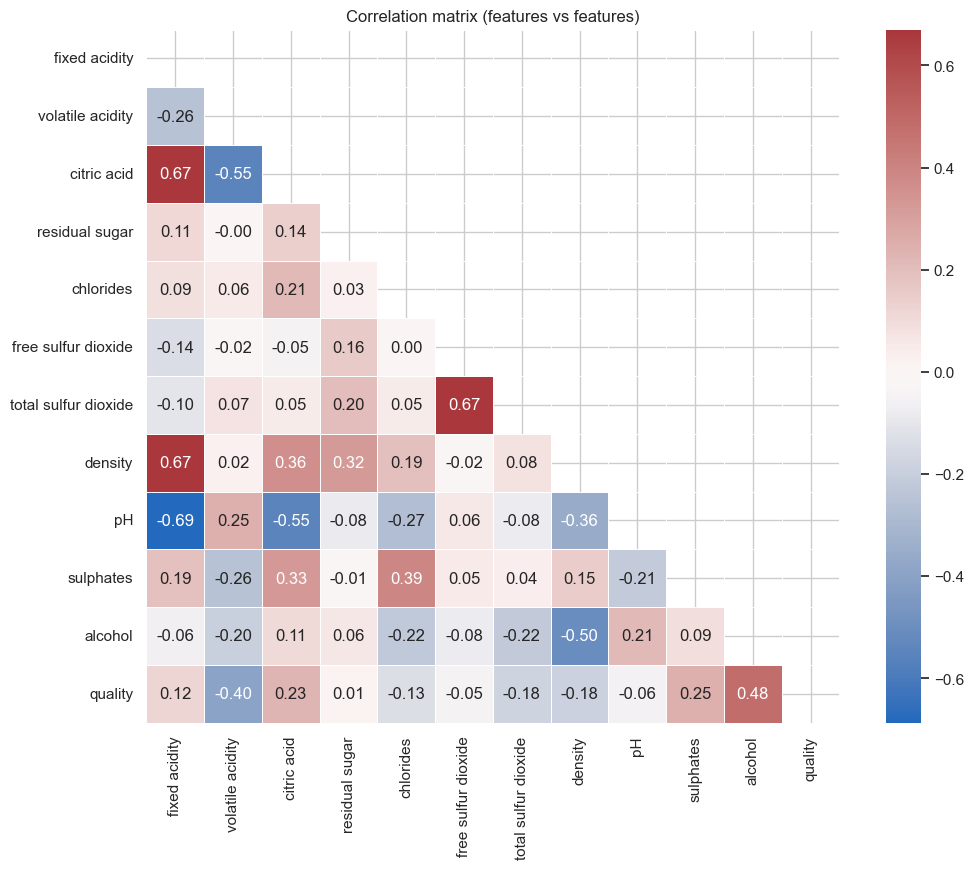


Quality value counts:
 quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64


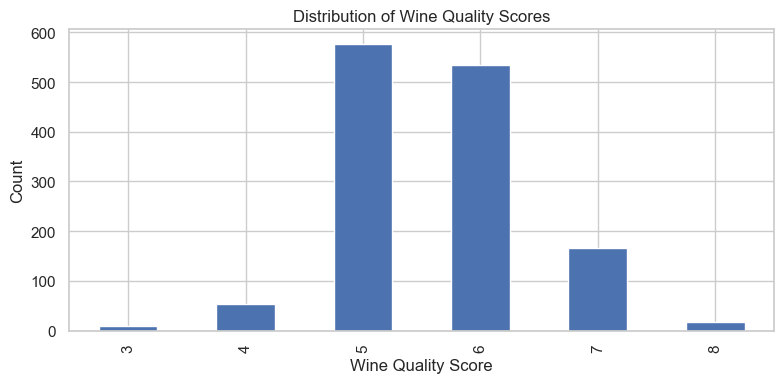

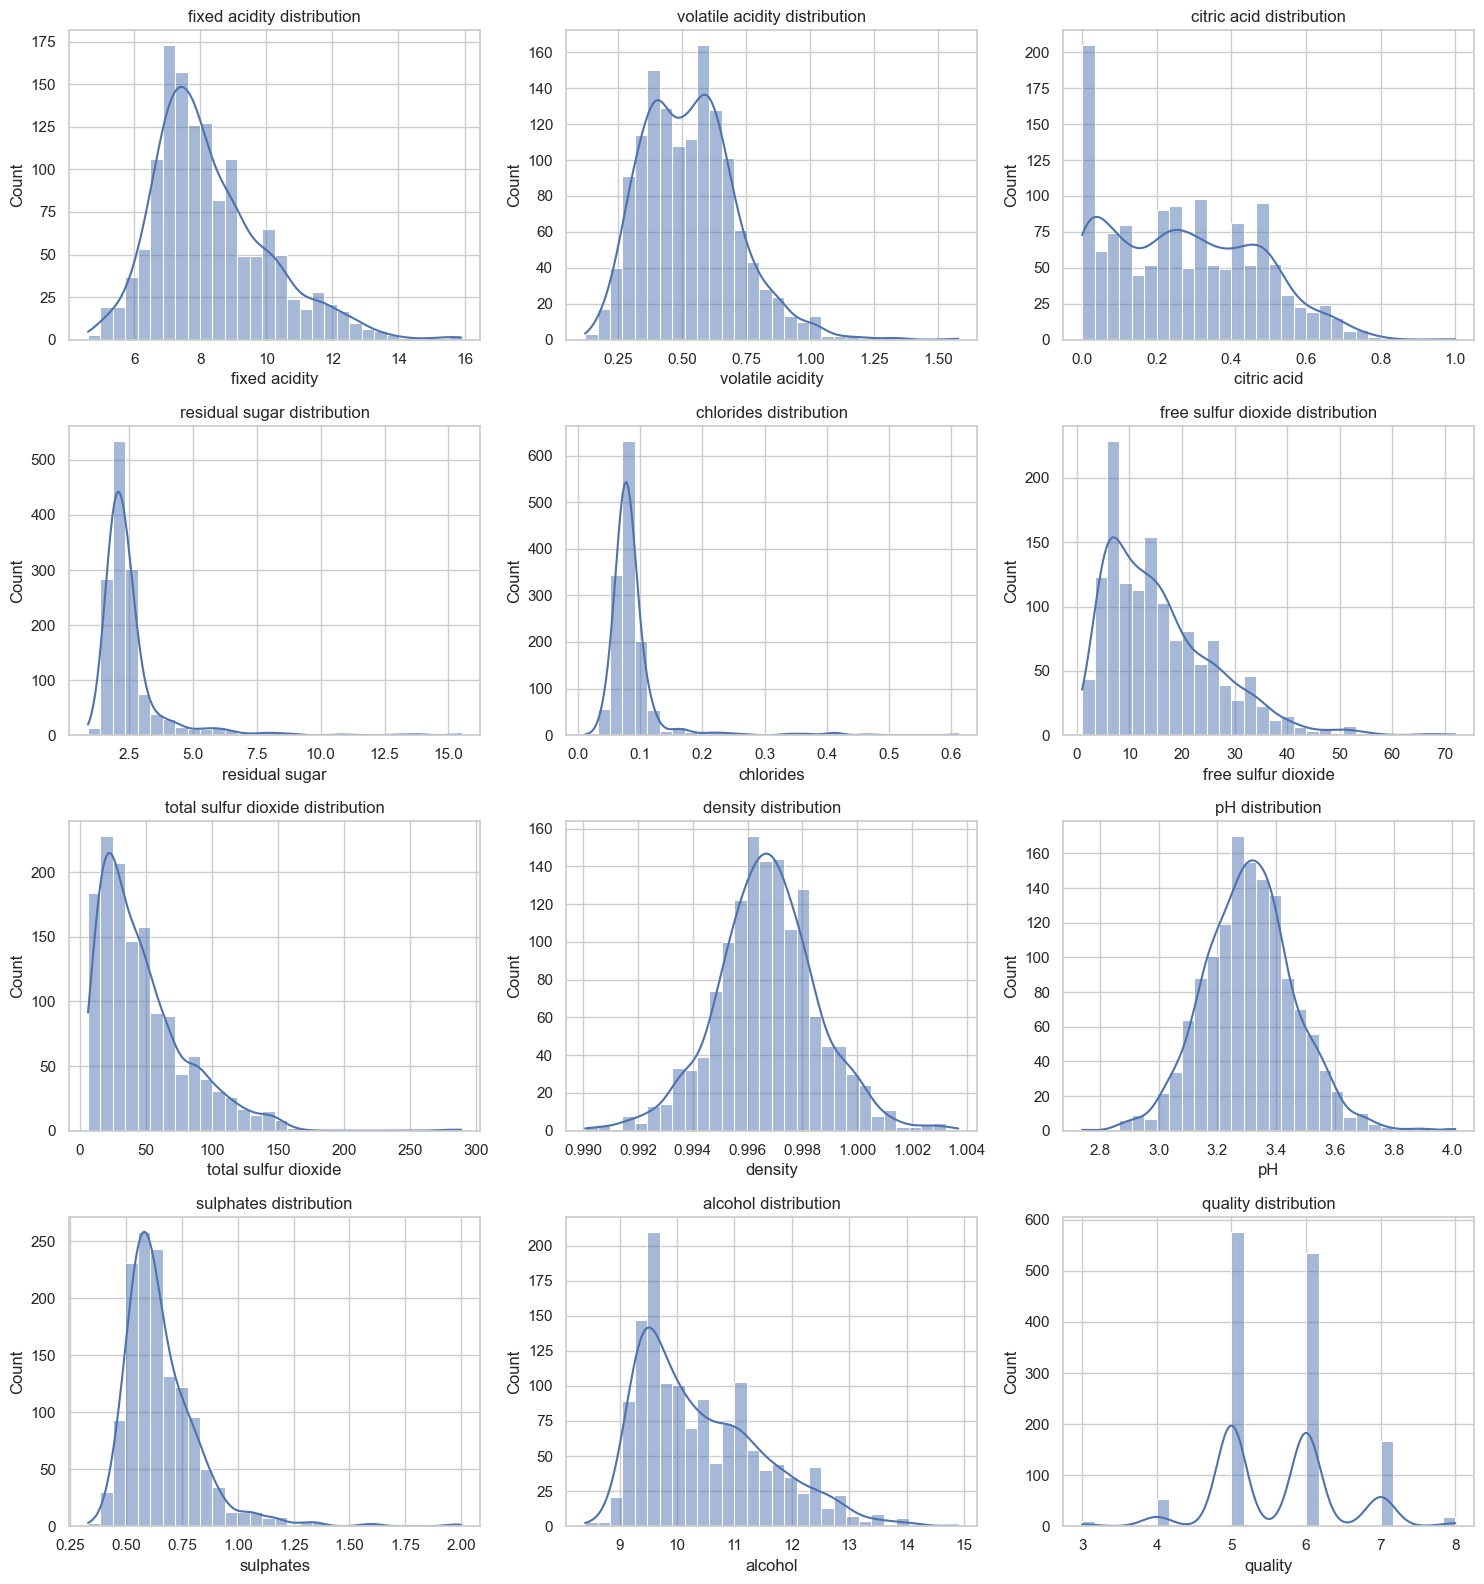

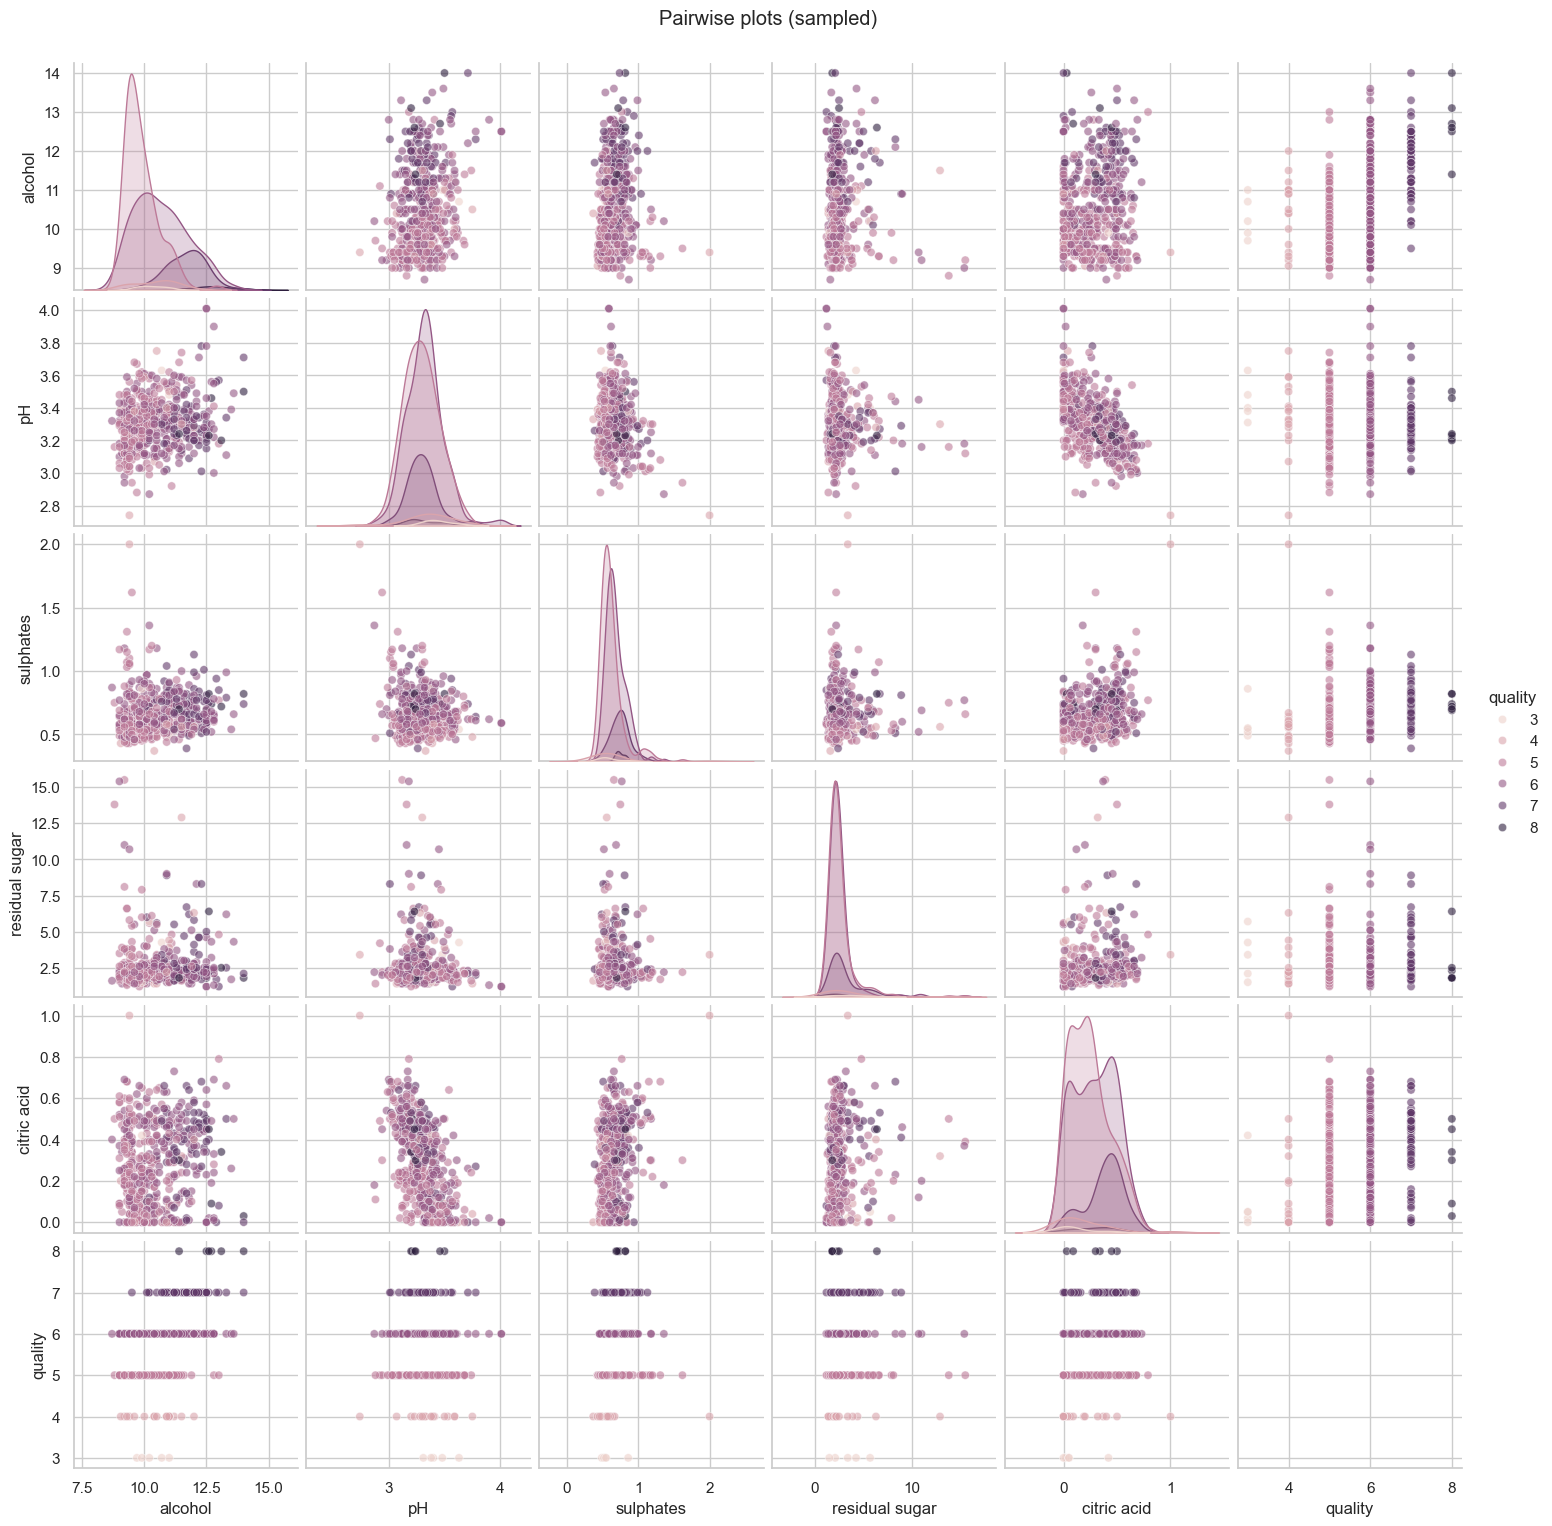

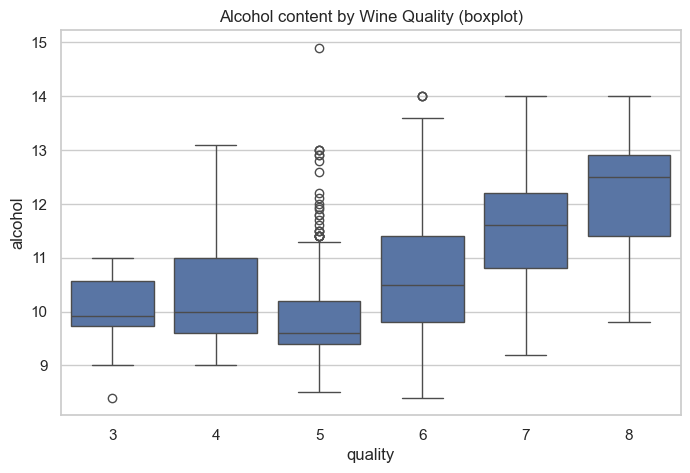

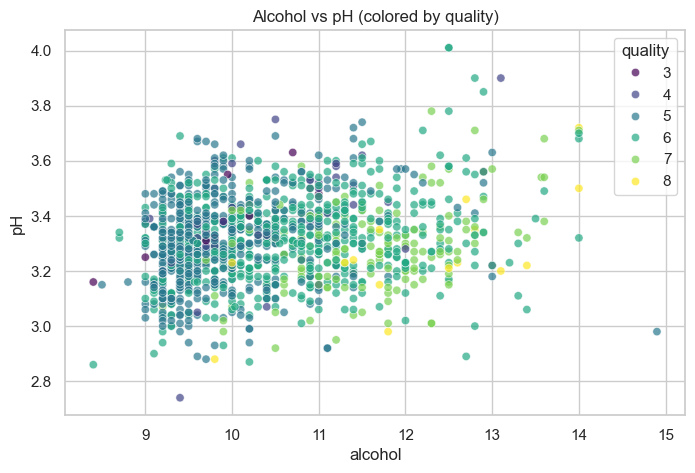


Pivot table (mean values per quality):


,alcohol,citric acid,pH,residual sugar,sulphates
quality,,,,,
3,9.955000,0.171000,3.398000,2.635000,0.570000
4,10.265094,0.174151,3.381509,2.694340,0.596415
5,9.888562,0.244523,3.300815,2.509532,0.623570
6,10.658879,0.279364,3.318000,2.457290,0.674542
7,11.491118,0.371856,3.290060,2.716766,0.742635
8,12.158824,0.382941,3.274118,2.576471,0.774706


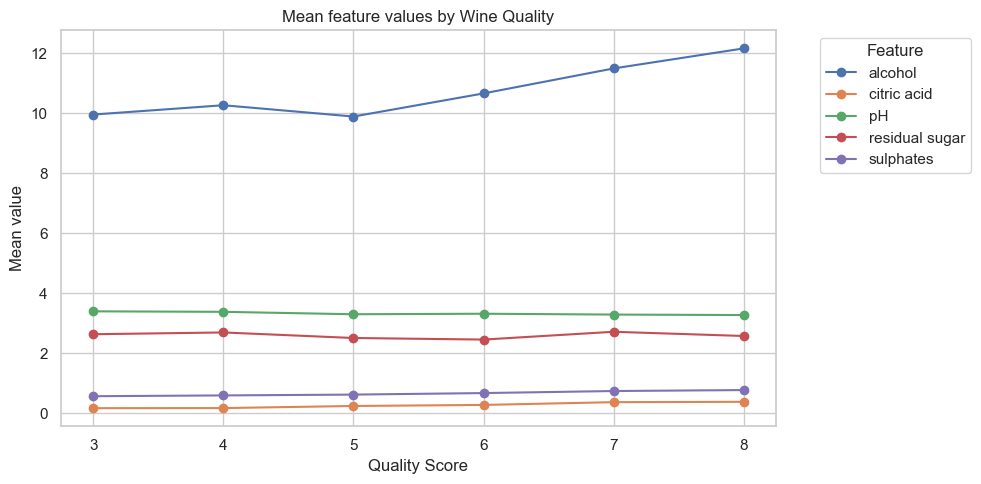

In [ ]:
# ---------------------------------------------------------
# Red Wine EDA — Load, Inspect, Visualize, Pivot (Detailed)
# ---------------------------------------------------------

# Make seaborn plots look nicer
sns.set(style="whitegrid")

# ---------------------------------------------------------
# Step 1 — Load dataset
# ---------------------------------------------------------
# Make sure 'winequality-red.csv' is in your working directory or provide full path.
red_wine_data_set = pd.read_csv('winequality-red.csv')

# Show the first few rows for a quick peek
display(red_wine_data_set.head())

# ---------------------------------------------------------
# Step 2 — Summary & basic info
# ---------------------------------------------------------
# Summary of dataframe structure: column names, dtypes, non-null counts
print("\n--- Info ---")
red_wine_data_set.info()

# Descriptive statistics for numeric columns (count, mean, std, min, 25%, 50%, 75%, max)
print("\n--- Describe ---")
display(red_wine_data_set.describe())

# Shape (rows, columns)
print("\nShape:", red_wine_data_set.shape)

# List column names
print("\nColumns:", list(red_wine_data_set.columns))

# Unique values in target column 'quality' (helps understand target range)
print("\nUnique quality scores:", sorted(red_wine_data_set['quality'].unique()))

# ---------------------------------------------------------
# Step 3 — Missing values & duplicates
# ---------------------------------------------------------
# Count missing values per column (should be zero for this dataset, but good to check)
print("\n--- Missing values per column ---")
display(red_wine_data_set.isnull().sum())

# Find duplicate rows (if any)
duplicates = red_wine_data_set[red_wine_data_set.duplicated()]
print("\nNumber of duplicate rows found:", duplicates.shape[0])

# If duplicates exist, drop them in-place (be careful in real analysis — sometimes duplicates are valid)
if duplicates.shape[0] > 0:
    red_wine_data_set.drop_duplicates(inplace=True)
    print("Duplicates dropped. New shape:", red_wine_data_set.shape)

# ---------------------------------------------------------
# Step 4 — Correlation matrix + heatmap
# ---------------------------------------------------------
# Compute correlation (Pearson by default)
corr_matrix = red_wine_data_set.corr()

# Print correlation of features with target 'quality' sorted by absolute correlation
print("\nTop features correlated with quality (absolute value):")
display(corr_matrix['quality'].abs().sort_values(ascending=False))

# Plot heatmap (annotated). Mask upper triangle to reduce redundancy.
plt.figure(figsize=(12, 9))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # requires numpy
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", mask=mask, square=True, linewidths=.5)
plt.title("Correlation matrix (features vs features)")
plt.show()

# ---------------------------------------------------------
# Step 5 — Target distribution (imbalance check)
# ---------------------------------------------------------
# Count of each quality score
quality_counts = red_wine_data_set['quality'].value_counts().sort_index()
print("\nQuality value counts:\n", quality_counts)

# Bar plot of quality distribution (sorted by quality label)
plt.figure(figsize=(8, 4))
quality_counts.plot(kind='bar')
plt.xlabel('Wine Quality Score')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality Scores')
plt.tight_layout()
plt.show()

# Note: If the target is imbalanced (some scores rare), consider grouping bins or stratified sampling for modeling.

# ---------------------------------------------------------
# Step 6 — Univariate distributions (numeric features only)
# ---------------------------------------------------------
# Select numeric columns (skip if you want explicit list)
numeric_cols = red_wine_data_set.select_dtypes(include=['number']).columns.tolist()

# Plot histograms with KDE for each numeric column
# Use a grid layout and reasonable figure size
n_cols = 3
n_rows = int((len(numeric_cols) + n_cols - 1) / n_cols)
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(red_wine_data_set[col], kde=True, bins=30)
    plt.title(f"{col} distribution")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Step 7 — Pairwise relations (sampled for speed)
# ---------------------------------------------------------
# Pairplot can be slow on full dataset -> sample if dataset is large
sample_df = red_wine_data_set.sample(n=min(500, len(red_wine_data_set)), random_state=42)
sns.pairplot(sample_df, vars=['alcohol', 'pH', 'sulphates', 'residual sugar', 'citric acid', 'quality'],
             hue='quality', plot_kws={'alpha':0.6})
plt.suptitle("Pairwise plots (sampled)", y=1.02)
plt.show()

# ---------------------------------------------------------
# Step 8 — Bivariate: boxplot & scatter examples
# ---------------------------------------------------------
# Boxplot: alcohol distribution by quality (shows median and outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=red_wine_data_set)
plt.title("Alcohol content by Wine Quality (boxplot)")
plt.show()

# Scatterplot: alcohol vs pH colored by quality
plt.figure(figsize=(8, 5))
sns.scatterplot(x='alcohol', y='pH', hue='quality', palette='viridis', data=red_wine_data_set, alpha=0.7)
plt.title("Alcohol vs pH (colored by quality)")
plt.show()

# ---------------------------------------------------------
# Step 9 — Pivot table example (mean values per quality)
# ---------------------------------------------------------
# Create a pivot table that shows mean of selected features for each quality score
pivot_cols = ['alcohol', 'pH', 'sulphates', 'citric acid', 'residual sugar']
pivot_table = red_wine_data_set.pivot_table(index='quality', values=pivot_cols, aggfunc='mean')

print("\nPivot table (mean values per quality):")
display(pivot_table)

# Visualize pivot table as line plot to see trends across quality scores
pivot_table.plot(marker='o', figsize=(10, 5))
plt.title("Mean feature values by Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Mean value")
plt.grid(True)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()